In [37]:
#import libraries
import os
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from Data_Prep import *

In [38]:
# Defining the file path for CAN datasets
in_can = "/media/arupreza/Assets/Data/Dataset_Yoonji/CAN/"

In [39]:
# List all files in the directory and store them in a variable
def get_file_list(directory):
    try:
        files = sorted(os.listdir(directory))  # Sort the files for consistent indexing
        print(f"Files in '{directory}':")
        for i, file in enumerate(files):
            print(f"{i + 1}: {file}")  # Display index for each file
        return files
    except FileNotFoundError:
        print(f"The directory '{directory}' does not exist.")
        return []
    except PermissionError:
        print(f"Permission denied for accessing the directory '{directory}'.")
        return []

In [40]:
# Main workflow
file_list = get_file_list(in_can)  # Get all filenames

Files in '/media/arupreza/Assets/Data/Dataset_Yoonji/CAN/':
1: normal_CAN.trc
2: normal_CAN_30(1).trc
3: normal_CAN_30(10).trc
4: normal_CAN_30(2).trc
5: normal_CAN_30(3).trc
6: normal_CAN_30(4).trc
7: normal_CAN_30(5).trc
8: normal_CAN_30(6).trc
9: normal_CAN_30(7).trc
10: normal_CAN_30(8).trc
11: normal_CAN_30(9).trc
12: replay_attack1_CAN_60(1).trc
13: replay_attack1_CAN_60(2).trc
14: replay_attack1_CAN_60(3).trc
15: replay_attack1_CAN_60(4).trc
16: replay_attack1_CAN_60(5).trc
17: replay_attack2_CAN_60(1).trc
18: replay_attack2_CAN_60(2).trc
19: replay_attack2_CAN_60(3).trc
20: replay_attack2_CAN_60(4).trc
21: replay_attack2_CAN_60(5).trc


In [41]:
cols = ["Time_Offset", "CAN_ID"] + [f'Payload_{i}' for i in range(1, 9)] + ["Time_Gap"]

In [57]:
# Define the function
def process_file(file_name, cols):

    # Prepend the directory path to the file name
    file_path = os.path.join(in_can, file_name)  # Full file path 

    # Convert the file into a DataFrame
    a = Convert_to_df(file_path)
    
    # Convert 'Time_Offset' to numeric
    a["Time_Offset"] = pd.to_numeric(a["Time_Offset"], errors="coerce")
    
    # Calculate the time gap
    a["Time_Gap"] = a["Time_Offset"].diff(1)
    
    # Reset the index
    a = a.reset_index(drop=True)
    
    # Select specified columns
    a = a[cols]
    
    # Replace NaN values with -1
    a = a.fillna(-0.001)

    a = a[a["CAN_ID"] == "0510"]
    
    return a

In [58]:
# Specify the file name
normal_CAN_30_1 = process_file("normal_CAN_30(1).trc", cols)
normal_CAN_30_1["Label"] = [0] * len(normal_CAN_30_1)

# Specify the file name
normal_CAN_30_2 = process_file("normal_CAN_30(2).trc", cols)
normal_CAN_30_2["Label"] = [0] * len(normal_CAN_30_2)

# Specify the file name
normal_CAN_30_3 = process_file("normal_CAN_30(3).trc", cols)
normal_CAN_30_3["Label"] = [0] * len(normal_CAN_30_3)

# Specify the file name
normal_CAN_30_4 = process_file("normal_CAN_30(4).trc", cols)
normal_CAN_30_4["Label"] = [0] * len(normal_CAN_30_4)

# Specify the file name
normal_CAN_30_5 = process_file("normal_CAN_30(5).trc", cols)
normal_CAN_30_5["Label"] = [0] * len(normal_CAN_30_5)

# Specify the file name
normal_CAN_30_6 = process_file("normal_CAN_30(6).trc", cols)
normal_CAN_30_6["Label"] = [0] * len(normal_CAN_30_6)

# Specify the file name
normal_CAN_30_7 = process_file("normal_CAN_30(7).trc", cols)
normal_CAN_30_7["Label"] = [0] * len(normal_CAN_30_7)

# Specify the file name
normal_CAN_30_8 = process_file("normal_CAN_30(8).trc", cols)
normal_CAN_30_8["Label"] = [0] * len(normal_CAN_30_8)

# Specify the file name
normal_CAN_30_9 = process_file("normal_CAN_30(9).trc", cols)
normal_CAN_30_9["Label"] = [0] * len(normal_CAN_30_9)

# Specify the file name
normal_CAN_30_10 = process_file("normal_CAN_30(10).trc", cols)
normal_CAN_30_10["Label"] = [0] * len(normal_CAN_30_10)


In [59]:
# Assuming process_file and cols are already defined
# Process files and add a "Label" column
normal_CAN_files = [
    "normal_CAN_30(1).trc", "normal_CAN_30(2).trc", "normal_CAN_30(3).trc",
    "normal_CAN_30(4).trc", "normal_CAN_30(5).trc", "normal_CAN_30(6).trc",
    "normal_CAN_30(7).trc", "normal_CAN_30(8).trc", "normal_CAN_30(9).trc",
    "normal_CAN_30(10).trc"
]

# Process all files into a list of DataFrames
dataframes = []
for file in normal_CAN_files:
    df = process_file(file, cols)
    df["Label"] = 0  # Assign label
    dataframes.append(df)

# Combine all DataFrames into one
All_Normal_df = pd.concat(dataframes, ignore_index=True)

In [54]:
# Specify the file name
replay_attack1_CAN_60_1 = process_file("replay_attack1_CAN_60(1).trc", cols)
replay_attack1_CAN_60_1["Label"] = [1] * len(replay_attack1_CAN_60_1)

# Specify the file name
replay_attack1_CAN_60_2 = process_file("replay_attack1_CAN_60(2).trc", cols)
replay_attack1_CAN_60_2["Label"] = [1] * len(replay_attack1_CAN_60_2)

# Specify the file name
replay_attack1_CAN_60_3 = process_file("replay_attack1_CAN_60(3).trc", cols)
replay_attack1_CAN_60_3["Label"] = [1] * len(replay_attack1_CAN_60_3)

# Specify the file name
replay_attack1_CAN_60_4 = process_file("replay_attack1_CAN_60(4).trc", cols)
replay_attack1_CAN_60_4["Label"] = [1] * len(replay_attack1_CAN_60_4)

# Specify the file name
replay_attack1_CAN_60_5 = process_file("replay_attack1_CAN_60(5).trc", cols)
replay_attack1_CAN_60_5["Label"] = [1] * len(replay_attack1_CAN_60_5)

# Specify the file name
replay_attack1_CAN_60_6 = process_file("replay_attack2_CAN_60(1).trc", cols)
replay_attack1_CAN_60_6["Label"] = [1] * len(replay_attack1_CAN_60_6)

# Specify the file name
replay_attack1_CAN_607 = process_file("replay_attack2_CAN_60(2).trc", cols)
replay_attack1_CAN_607["Label"] = [1] * len(replay_attack1_CAN_607)

# Specify the file name
replay_attack1_CAN_60_8 = process_file("replay_attack2_CAN_60(3).trc", cols)
replay_attack1_CAN_60_8["Label"] = [1] * len(replay_attack1_CAN_60_8)

# Specify the file name
replay_attack1_CAN_60_9 = process_file("replay_attack2_CAN_60(4).trc", cols)
replay_attack1_CAN_60_9["Label"] = [1] * len(replay_attack1_CAN_60_9)

# Specify the file name
replay_attack1_CAN_60_10 = process_file("replay_attack2_CAN_60(5).trc", cols)
replay_attack1_CAN_60_10["Label"] = [1] * len(replay_attack1_CAN_60_10)


In [60]:
All_Normal_df

,Time_Offset,CAN_ID,Payload_1,Payload_2,Payload_3,Payload_4,Payload_5,Payload_6,Payload_7,Payload_8,Time_Gap,Label
0,38.8,0510,00,00,00,00,00,00,00,00,0.4,0
1,138.8,0510,00,00,00,00,00,00,00,00,0.4,0
2,238.8,0510,00,00,00,00,00,00,00,00,0.4,0
3,338.8,0510,00,00,00,00,00,00,00,00,0.4,0
4,438.8,0510,00,00,00,00,00,00,00,00,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3065,30241.7,0510,00,00,12,00,0C,16,00,00,0.3,0
3066,30341.8,0510,00,00,12,00,0C,16,00,00,0.2,0
3067,30441.6,0510,00,00,12,00,0C,16,00,00,0.2,0
3068,30541.8,0510,00,00,12,00,0C,16,00,00,0.3,0


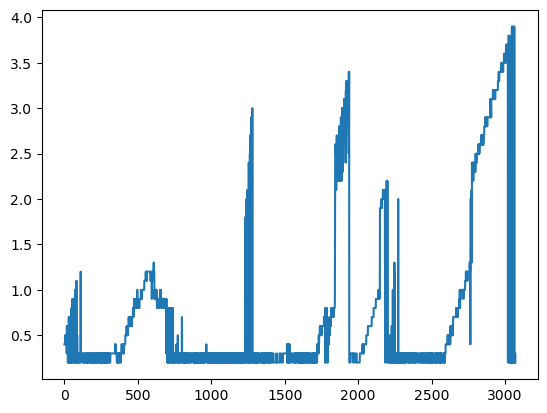

In [61]:
plt.plot(All_Normal_df[All_Normal_df["CAN_ID"] == "0510"]["Time_Gap"])

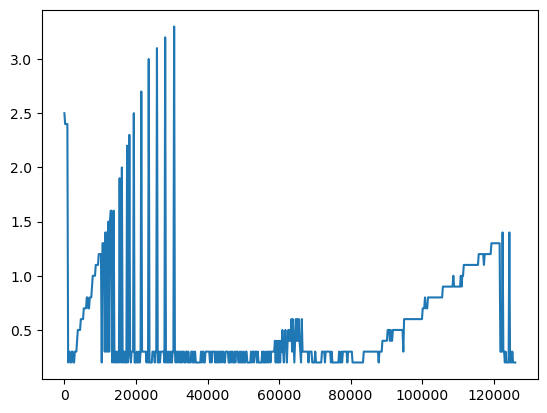

In [50]:
plt.plot(replay_attack1_CAN_60_1[replay_attack1_CAN_60_1["CAN_ID"] == "0510"]["Time_Gap"])